In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import * 

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold , KFold

from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [11]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [12]:
target = 'target'

train = pd.read_csv("data-comp/data_3.csv")
test = pd.read_csv("data-comp/test_data_imputer.csv")

train.drop(columns=['html_num_tags'], inplace=True)

x = train.drop(target, axis = 1)
y = train.loc[:, target]

# test_indices = test['idx']
features = list(filter(lambda f: f in x.columns, test.columns))
test = test[features]

In [13]:
submission = pd.read_csv("data-comp/sample_submission.csv")
submission.head()

,id,expected
0,0,-1
1,1,-1
2,2,-1
3,3,1
4,4,1


In [14]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a'),target
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,18.0,20.0,0.0,21.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.708966,1.0,33.0,101.0,3.0,70.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,15.0,151.0,1.0,55.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,10.0,332.0,0.0,321.0,0


In [15]:
test.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a')
0,97.0,0.0,80.0,17.0,17.0,4.0,0.0,0.0,0.0,4.844913,0.0,5.0,12.0,1.0,3.0
1,37.0,0.0,22.0,15.0,15.0,3.0,1.0,0.0,0.0,4.246157,1.0,27.0,158.0,2.0,182.4
2,44.0,0.0,24.4,20.0,20.0,3.0,3.0,0.0,0.0,4.612835,0.0,6.0,34.0,0.0,136.0
3,40.0,0.0,14.0,26.0,26.0,2.0,0.0,0.0,0.0,4.238521,0.0,1.2,29.0,1.0,2.0
4,43.0,2.0,17.2,26.0,26.0,2.0,0.0,0.0,0.0,4.240669,0.0,2.0,41.0,1.0,16.4


In [16]:
SEED = 43

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = SEED)

In [18]:
x_train.shape

(2261, 15)

In [19]:
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

### **XGB**

In [14]:
depth = list(range(1, 35))
f1 = []
for d in depth :
    m = XGBClassifier(max_depth = d)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append(f1_score(y_val, p))

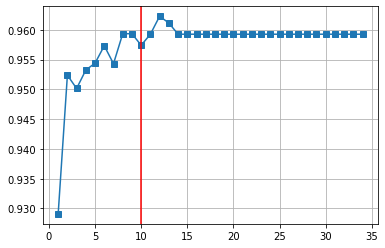

In [15]:
plt.plot(depth, f1, marker = 's')
plt.axvline(10, color='r')
plt.grid()
plt.show()

In [16]:
n_estimators = list(range(10, 150))
f1 = []
for d in n_estimators :
    m = XGBClassifier(n_estimators = d)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append(f1_score(y_val, p))

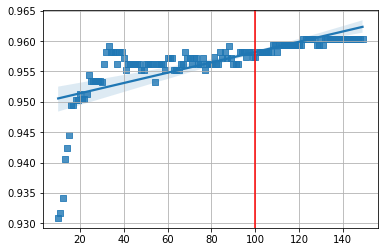

In [17]:
sns.regplot(n_estimators, f1, marker = 's')
plt.axvline(100, color='r')
plt.grid()
plt.show()

In [18]:
learning_rate = [0.1 * i for i in range(1, 10)]
f1 = []
for r in learning_rate :
    m = XGBClassifier(n_estimators=120, max_depth=12, learning_rate=r)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append(f1_score(y_val, p))

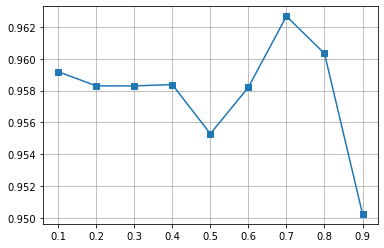

In [19]:
plt.plot(learning_rate, f1, marker = 's')
plt.grid()
plt.show()

In [25]:
params = { 
        'n_estimators' : range(100, 125, 5), 
        'max_depth' : range(11, 14), 
        'learning_rate': [0.3, 0.7, 0.8] 
         }

In [26]:
model = XGBClassifier()
model_gs = GridSearchCV(model
                            , params              
                            , cv = cv             
                            , verbose=1
                            )
model_gs.fit(x_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=43, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [27]:
model_gs.best_params_

{'learning_rate': 0.7, 'max_depth': 12, 'n_estimators': 105}

In [20]:
model = XGBClassifier(n_estimators = 105, max_depth=12, learning_rate=0.7)
model.fit(x_train, y_train)

x_pred = model.predict(x_val)

In [21]:
f1_score(y_val, x_pred), accuracy_score(y_val, x_pred)

(0.9616935483870968, 0.9608247422680413)

In [22]:
confusion_matrix( y_val , x_pred)

array([[455,  23],
       [ 15, 477]], dtype=int64)

In [23]:
print(classification_report(y_val, x_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       478
           1       0.95      0.97      0.96       492

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



In [24]:
model = XGBClassifier(n_estimators = 105, max_depth=12, learning_rate=0.7)
model.fit(x, y)

result = model.predict(test)

submission['expected'] = list(map(lambda x: -1 if x == 1 else 1, result))
submission

,id,expected
0,0,1
1,1,1
2,2,1
3,3,-1
4,4,-1
...,...,...
2436,2436,1
2437,2437,-1
2438,2438,1
2439,2439,-1


In [25]:
submission.to_csv("result/submission_xgb.csv", index=False)

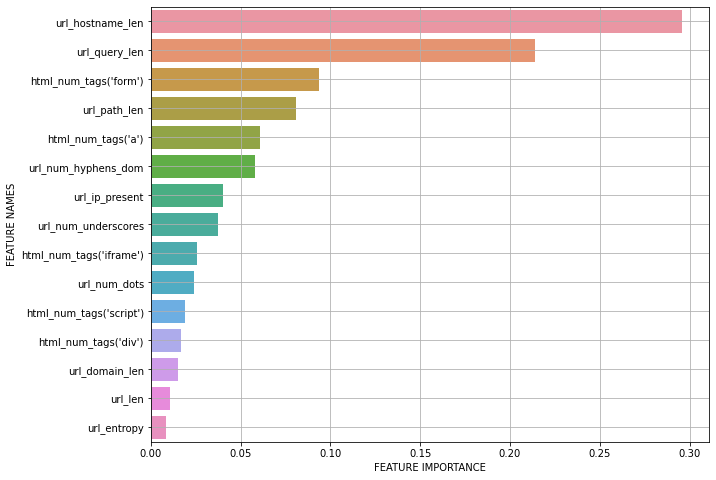

In [26]:
result = plot_feature_importance(model.feature_importances_, list(x_train))

### **RF**

In [38]:
depth = list(range(3, 40))
f1 = []
for d in depth :
    m = RandomForestClassifier(max_depth = d)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append(f1_score(y_val, p))

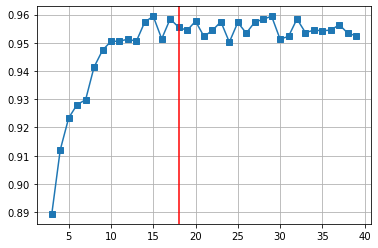

In [39]:
plt.plot(depth, f1, marker = 's')
plt.axvline(18, color='r')
plt.grid()
plt.show()

In [42]:
n_estimators = list(range(20, 120))
f1 = []
for d in n_estimators :
    m = RandomForestClassifier(n_estimators = d, max_depth=18)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append(f1_score(y_val, p))

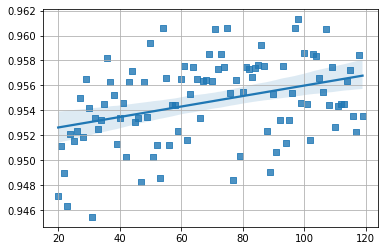

In [43]:
sns.regplot(n_estimators, f1, marker = 's')
plt.grid()
plt.show()

In [254]:
params = { 
        'n_estimators' : range(60, 100), 
        'max_depth' : range(15, 23), 
         }

model = RandomForestClassifier()
model_rs = GridSearchCV(model
                            , params              # hyperparameter 범위 지정.
                            , cv = 5                    # k-fold Cross Validation
                            )
model_rs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(15, 23),
                         'n_estimators': range(60, 100)})

In [255]:
model_rs.best_params_

{'max_depth': 16, 'n_estimators': 78}

In [27]:
model = RandomForestClassifier(n_estimators = 78, max_depth=16)
model.fit(x_train, y_train)

x_pred = model.predict(x_val)

In [28]:
f1_score(y_val, x_pred), accuracy_score(y_val, x_pred)

(0.9534412955465588, 0.9525773195876288)

In [29]:
confusion_matrix(y_val, x_pred)

array([[453,  25],
       [ 21, 471]], dtype=int64)

In [48]:
print(classification_report(y_val, x_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       478
           1       0.95      0.96      0.95       492

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



In [30]:
model = RandomForestClassifier(n_estimators = 78, max_depth=16)
model.fit(x, y)

result = model.predict(test)
submission['expected'] = list(map(lambda x: -1 if x == 1 else 1, result))
submission

,id,expected
0,0,1
1,1,1
2,2,1
3,3,-1
4,4,-1
...,...,...
2436,2436,1
2437,2437,-1
2438,2438,1
2439,2439,-1


In [31]:
submission.to_csv("result/submission_rf.csv", index=False)

### **SVC**

In [51]:
C_list = list(range(20, 140, 5))
f1 = []
for d in C_list :
    m = SVC(C = d, kernel='rbf')
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append( f1_score(y_val, p) )

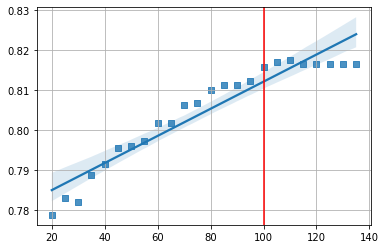

In [52]:
sns.regplot(C_list, f1, marker = 's')
plt.axvline(100, color='r')
plt.grid()
plt.show()

In [55]:
svc_clf = SVC(
            C = 100, 
            kernel = 'rbf',
            gamma = 0.1
            )

In [56]:
svc_clf.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [57]:
svc_preds = svc_clf.predict(x_val)
accuracy_score(y_val, svc_preds), f1_score(y_val, svc_preds, average='macro')

(0.7876288659793814, 0.7798796178793005)

### **Voting**

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(random_state=SEED)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=SEED)
clf3 = make_pipeline(StandardScaler(), KNeighborsClassifier())
clf4 = DecisionTreeClassifier(criterion = 'entropy', max_depth=12, min_samples_leaf=4, random_state=SEED)
clf5 = XGBClassifier(n_estimators = 108, max_depth=13, learning_rate=0.3, random_state=SEED)

model_hard = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3), ('df', clf4), ('xgb', clf5)], voting='hard')
model_hard = model_hard.fit(x_train, y_train)

hard_pred = model_hard.predict(x_val)

model_soft = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3), ('df', clf4), ('xgb', clf5)], voting='soft')
model_soft = model_soft.fit(x_train, y_train)
soft_pred = model_soft.predict(x_val)

In [33]:
f1_score(y_val, hard_pred), accuracy_score(y_val, hard_pred)

(0.9591836734693877, 0.9587628865979382)

In [34]:
f1_score(y_val, soft_pred), accuracy_score(y_val, soft_pred)

(0.9530612244897959, 0.9525773195876288)

In [35]:
confusion_matrix(y_val, hard_pred)

array([[460,  18],
       [ 22, 470]], dtype=int64)

In [36]:
confusion_matrix(y_val, soft_pred)

array([[457,  21],
       [ 25, 467]], dtype=int64)

In [37]:
print(classification_report(y_val, hard_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       478
           1       0.96      0.96      0.96       492

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



In [38]:
print(classification_report(y_val, soft_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       478
           1       0.96      0.95      0.95       492

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



In [39]:
model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3), ('df', clf4), ('xgb', clf5)], voting='soft')
model = model.fit(x, y)

In [40]:
result = model.predict(test)

In [41]:
submission['expected'] = list(map(lambda x: -1 if x == 1 else 1, result))
submission.to_csv("result/submission_voting.csv", index=False)

### **DT**

In [72]:
depth = list(range(3, 55))
f1 = []
for d in depth :
    m = DecisionTreeClassifier(max_depth = d)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append( f1_score(y_val, p) )

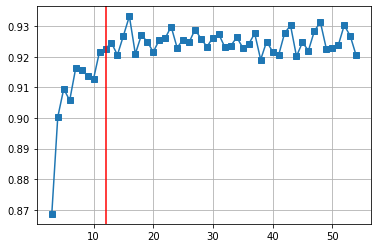

In [73]:
plt.plot(depth, f1, marker = 's')
plt.axvline(12, color='r')
plt.grid()
plt.show()

In [74]:
min_samples_leaf = list(range(1, 75))
f1 = []
for d in min_samples_leaf :
    m = DecisionTreeClassifier(min_samples_leaf = d, max_depth=16)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append( f1_score(y_val, p) )

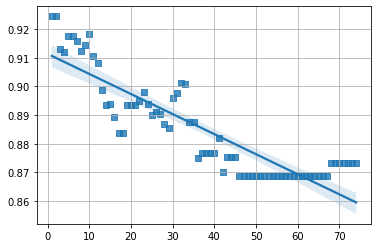

In [75]:
sns.regplot(min_samples_leaf, f1, marker = 's')
plt.grid()
plt.show()

In [76]:
params = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1, 15),
    "min_samples_leaf" : range(7, 50),
}
model = DecisionTreeClassifier()
model_gs = GridSearchCV(model
                            , params              # hyperparameter 범위 지정.
                            , cv = cv             # k-fold Cross Validation
                            )
model_gs.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=43, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(7, 50)})

In [77]:
model_gs.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 7}

In [79]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=14, min_samples_leaf=7)
model.fit(x_train, y_train)

x_pred = model.predict(x_val)

In [80]:
f1_score(y_val, x_pred), accuracy_score(y_val, x_pred)

(0.9232323232323232, 0.9216494845360824)

In [82]:
confusion_matrix(y_val, x_pred)

array([[437,  41],
       [ 35, 457]], dtype=int64)

In [83]:
print(classification_report(y_val, x_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       478
           1       0.92      0.93      0.92       492

    accuracy                           0.92       970
   macro avg       0.92      0.92      0.92       970
weighted avg       0.92      0.92      0.92       970



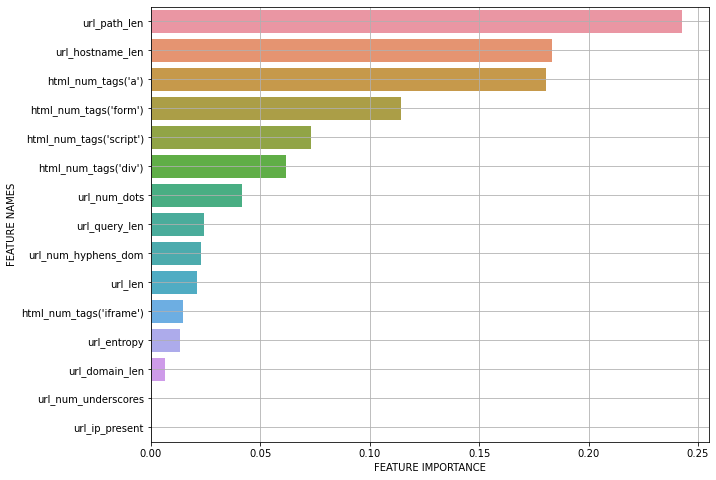

In [84]:
result = plot_feature_importance(model.feature_importances_, list(x_train))

### **Stacking**

In [42]:
estimators = [('lr', LogisticRegression()),
              ('dt', DecisionTreeClassifier()),
              ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier())),
              ('rf', RandomForestClassifier())]

model_stacking = StackingClassifier(estimators=estimators
                                    , final_estimator= XGBClassifier())

In [43]:
model_stacking.fit(x_train, y_train)
x_pred = model_stacking.predict(x_val)

In [44]:
f1_score(y_val, x_pred), accuracy_score(y_val, x_pred)

(0.9521871820956256, 0.9515463917525773)

In [45]:
confusion_matrix(y_val, x_pred)

array([[455,  23],
       [ 24, 468]], dtype=int64)

In [46]:
print(classification_report(y_val, x_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       478
           1       0.95      0.95      0.95       492

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



In [47]:
model = StackingClassifier(estimators=estimators, final_estimator= XGBClassifier())
model.fit(x, y)

result = model.predict(test)
submission['expected'] = list(map(lambda x: -1 if x == 1 else 1, result))
submission.to_csv("result/submission_stacking.csv", index=False)

### **Naive Bayes**

In [92]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

In [93]:
model = BernoulliNB()
model.fit(x_train, y_train)

x_pred = model.predict(x_val)

In [96]:
f1_score(y_val, x_pred), accuracy_score(y_val, x_pred)

(0.815515610217597, 0.7989690721649485)

In [97]:
confusion_matrix(y_val, x_pred)

array([[344, 134],
       [ 61, 431]], dtype=int64)

In [98]:
print(classification_report(y_val, x_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       478
           1       0.76      0.88      0.82       492

    accuracy                           0.80       970
   macro avg       0.81      0.80      0.80       970
weighted avg       0.81      0.80      0.80       970



In [99]:
result = model_stacking.predict(test)
submission['expected'] = list(map(lambda x: -1 if x == 1 else 1, result))
submission.to_csv("result/submission_nb.csv", index=False)

전체 모델 평가

In [100]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [106]:
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.846 (0.019)
>knn 0.872 (0.019)
>rf 0.958 (0.012)
>dt 0.930 (0.013)
>xgb 0.957 (0.014)
>nb 0.801 (0.021)
>svc 0.763 (0.030)


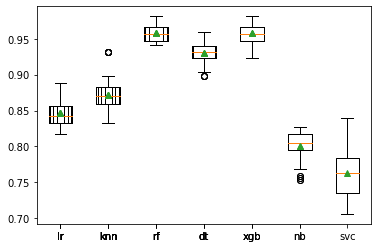

In [107]:
models = [('lr', LogisticRegression()), 
        ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier())),
        ('rf', RandomForestClassifier()), 
        ('dt', DecisionTreeClassifier()),
        ('xgb', XGBClassifier()),
        ('nb', BernoulliNB()),
        ('svc', SVC(kernel='rbf'))] 

vals, x_axis = [], []
for name, model in models:
    scores = evaluate_model(model, x, y)
    vals.append(scores)
    x_axis.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    plt.boxplot(vals, labels=x_axis, showmeans=True)
plt.show()